In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
def get_cleaned_data(data, threshold = 0.3):
  log_returns = np.log(data['Close'] / data['Close'].shift(1))
  thresh_count = int(log_returns.shape[0] * threshold)
  return log_returns.dropna(axis=1, thresh=thresh_count).dropna()

In [3]:
def plot_dates(data, start_date, end_date):
  complete_dates = pd.date_range(start=start_date, end=end_date, freq='B')
  missing_dates = complete_dates.difference(data.index)
  print(len(missing_dates), len(complete_dates), len(missing_dates) / len(complete_dates))
  missing_dates_df = pd.DataFrame(index=missing_dates, data={'Missing': 1})
  plt.figure(figsize=(10, 6))
  plt.scatter(missing_dates_df.index, missing_dates_df['Missing'], color='red', s=3)
  plt.title('Dates with Missing Data')
  plt.xlabel('Date')
  plt.ylabel('Close Price')
  plt.legend()
  plt.grid(True)
  plt.show()

In [21]:
def find_threshold(data):
  total_entries_list = []
  total_instruments_list = []
  missing_shares_list = []
  thresholds = np.linspace(0.01, 1, 100)
  for threshold in thresholds:
    clean_data = get_cleaned_data(data, threshold)
    complete_dates = pd.date_range(start=clean_data.index.min(), end=clean_data.index.max(), freq='B')
    missing_dates = complete_dates.difference(clean_data.index)
    missing_share = len(missing_dates) / len(complete_dates)
    total_entries, total_instruments = clean_data.shape
    total_entries_list.append(total_entries)
    total_instruments_list.append(total_instruments)
    missing_shares_list.append(missing_share)

  fig, axs = plt.subplots(3, 1, figsize=(10, 15))
  axs[0].plot(thresholds, total_entries_list, 'tab:red')
  axs[0].set_xlabel('Threshold')
  axs[0].set_ylabel('Total Entries')
  axs[0].set_title('Total Entries vs. Threshold')

  axs[1].plot(thresholds, total_instruments_list, 'tab:blue')
  axs[1].set_xlabel('Threshold')
  axs[1].set_ylabel('Total Instruments')
  axs[1].set_title('Total Instruments vs. Threshold')

  axs[2].plot(thresholds, missing_shares_list, 'tab:green')
  axs[2].set_xlabel('Threshold')
  axs[2].set_ylabel('Missing Share')
  axs[2].set_title('Missing Share vs. Threshold')

  plt.tight_layout()
  plt.show()

# Stocks

In [73]:
stocks_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    )[0]['Symbol'].tolist()

stocks = yf.download(stocks_tickers, start='1900-01-01', end='2024-02-16')

[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['BF.B']: Exception('%ticker%: 1d data not available for startTime=-2208971040 and endTime=1708059600. Only 100 years worth of day granularity data are allowed to be fetched per request.')


In [74]:
clean_stocks = get_cleaned_data(stocks, threshold = 0.3)
clean_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4742 entries, 2005-04-15 to 2024-02-15
Columns: 403 entries, A to ZION
dtypes: float64(403)
memory usage: 14.6 MB


27 784 0.03443877551020408


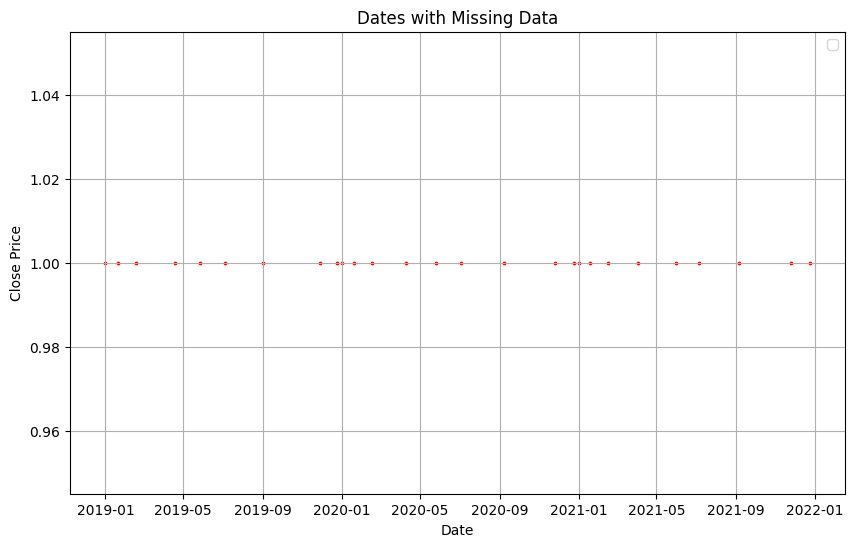

In [75]:
# plot_dates(clean_stocks, clean_stocks.index.min(), clean_stocks.index.max())
plot_dates(clean_stocks, '2019-01-01', '2021-12-31')

So these are same dates every year, and they are not consecutive. So datasets should be fine

# Commodities

In [4]:
commodities_tickers = ['GC=F', 'SI=F', 'CL=F', 'C=F', 'S=F', 'HG=F', 'PL=F',
                       'PA=F', 'NG=F', 'HE=F', 'CC=F', 'CT=F', 'SB=F', 'ALI=F',
                       'NI=F', 'PB=F', 'HG=F', 'SN=F', 'LCO=F', 'OP=F', 'WO=F',
                       'KC=F', 'C=F', 'ZR=F', 'CO=F', 'LIT-USD', 'UX-U21.NYMEX',
                       'HRC=F', 'DC=F', 'MTF=F']
commodities = yf.download(commodities_tickers,
                          start='1900-01-01',
                          end='2022-02-16')

[*********************100%%**********************]  28 of 28 completed
ERROR:yfinance:
10 Failed downloads:
ERROR:yfinance:['WO=F', 'LCO=F', 'PB=F', 'SN=F', 'OP=F', 'NI=F', 'CO=F', 'UX-U21.NYMEX']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['C=F', 'S=F']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1900-01-01 -> 2022-02-16)')


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/usr/local

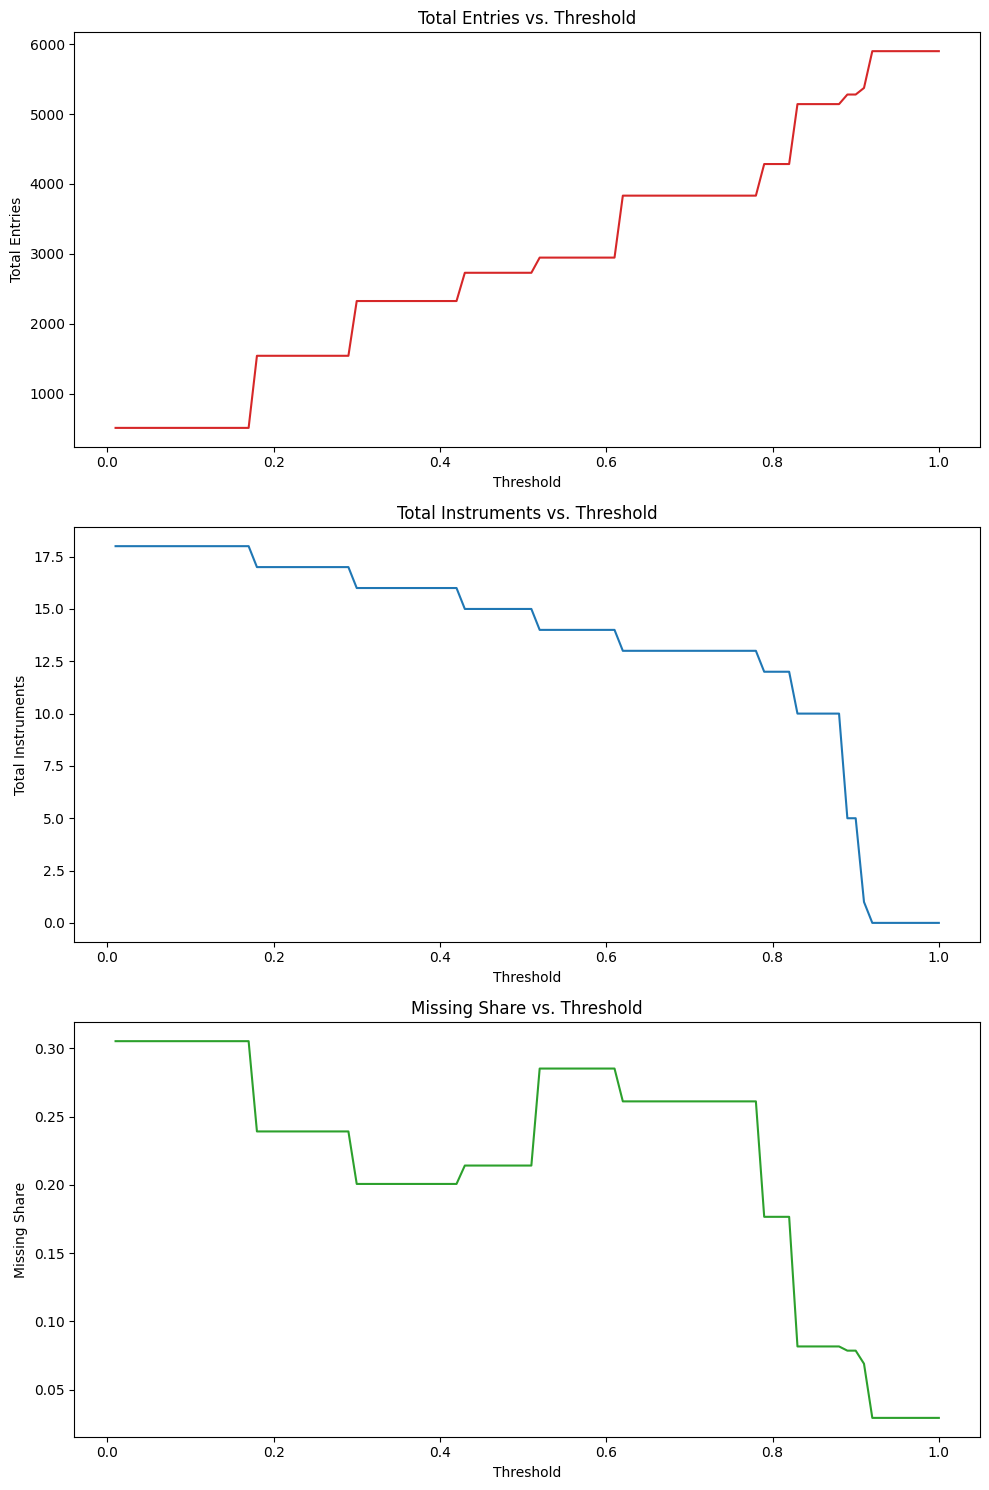

In [22]:
find_threshold(commodities)

In [25]:
clean_commodities = get_cleaned_data(commodities, threshold = 0.85)
clean_commodities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5142 entries, 2000-08-31 to 2022-02-15
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CC=F    5142 non-null   float64
 1   CL=F    5142 non-null   float64
 2   CT=F    5142 non-null   float64
 3   GC=F    5142 non-null   float64
 4   HG=F    5142 non-null   float64
 5   KC=F    5142 non-null   float64
 6   NG=F    5142 non-null   float64
 7   SB=F    5142 non-null   float64
 8   SI=F    5142 non-null   float64
 9   ZR=F    5142 non-null   float64
dtypes: float64(10)
memory usage: 441.9 KB


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


91 1043 0.087248322147651


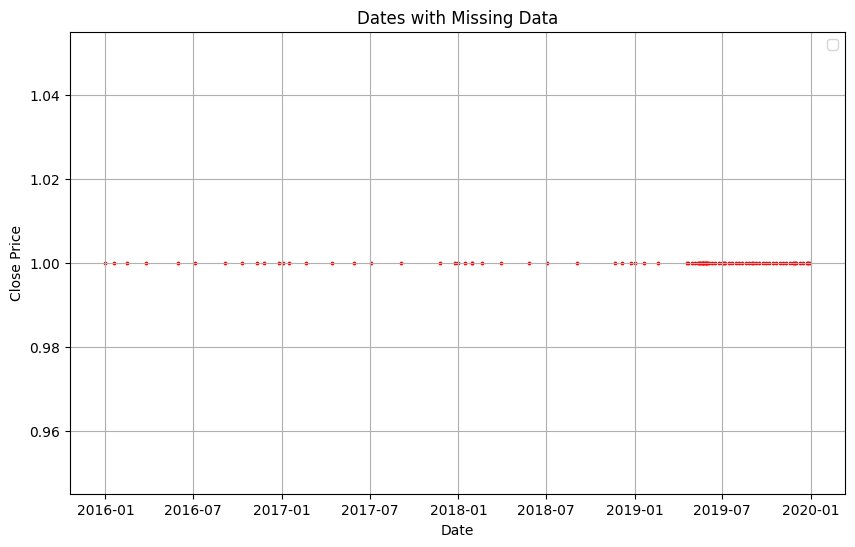

In [31]:
# plot_dates(clean_commodities, clean_commodities.index.min(), clean_commodities.index.max())
plot_dates(clean_commodities, '2016-01-01', '2019-12-31')

264 4783 0.05519548400585406


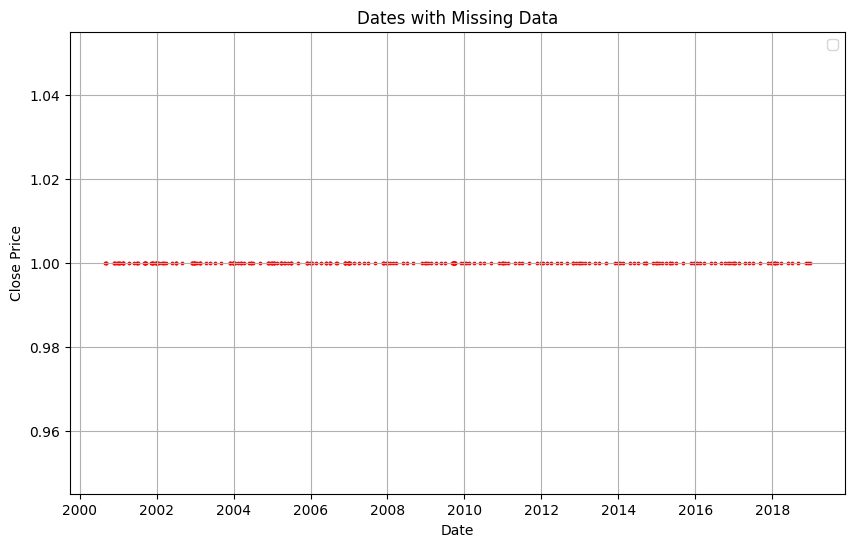

In [35]:
plot_dates(clean_commodities.loc[:'2018'], clean_commodities.loc[:'2018'].index.min(), clean_commodities.loc[:'2018'].index.max())

In [36]:
clean_commodities = clean_commodities.loc[:'2018']

# Cryptos

In [37]:
cryptos_tickers = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'XRP-USD',
                   'ADA-USD', 'SOL-USD', 'AVAX-USD', 'DOGE-USD', 'LUNA1-USD',
                   'DOT-USD', 'SHIB-USD', 'LINK-USD', 'CRO-USD', 'LTC-USD',
                   'ALGO-USD', 'WBTC-USD', 'MATIC-USD', 'ICP-USD', 'ATOM1-USD',
                   'VET-USD', 'FIL-USD', 'TRX-USD', 'THETA-USD', 'XLM-USD',
                   'FTT-USD', 'UST-USD', 'HBAR-USD', 'XTZ-USD']
cryptos = yf.download(cryptos_tickers, start='1900-01-01', end='2022-02-16')

[*********************100%%**********************]  29 of 29 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ATOM1-USD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1900-01-01 -> 2022-02-16)')


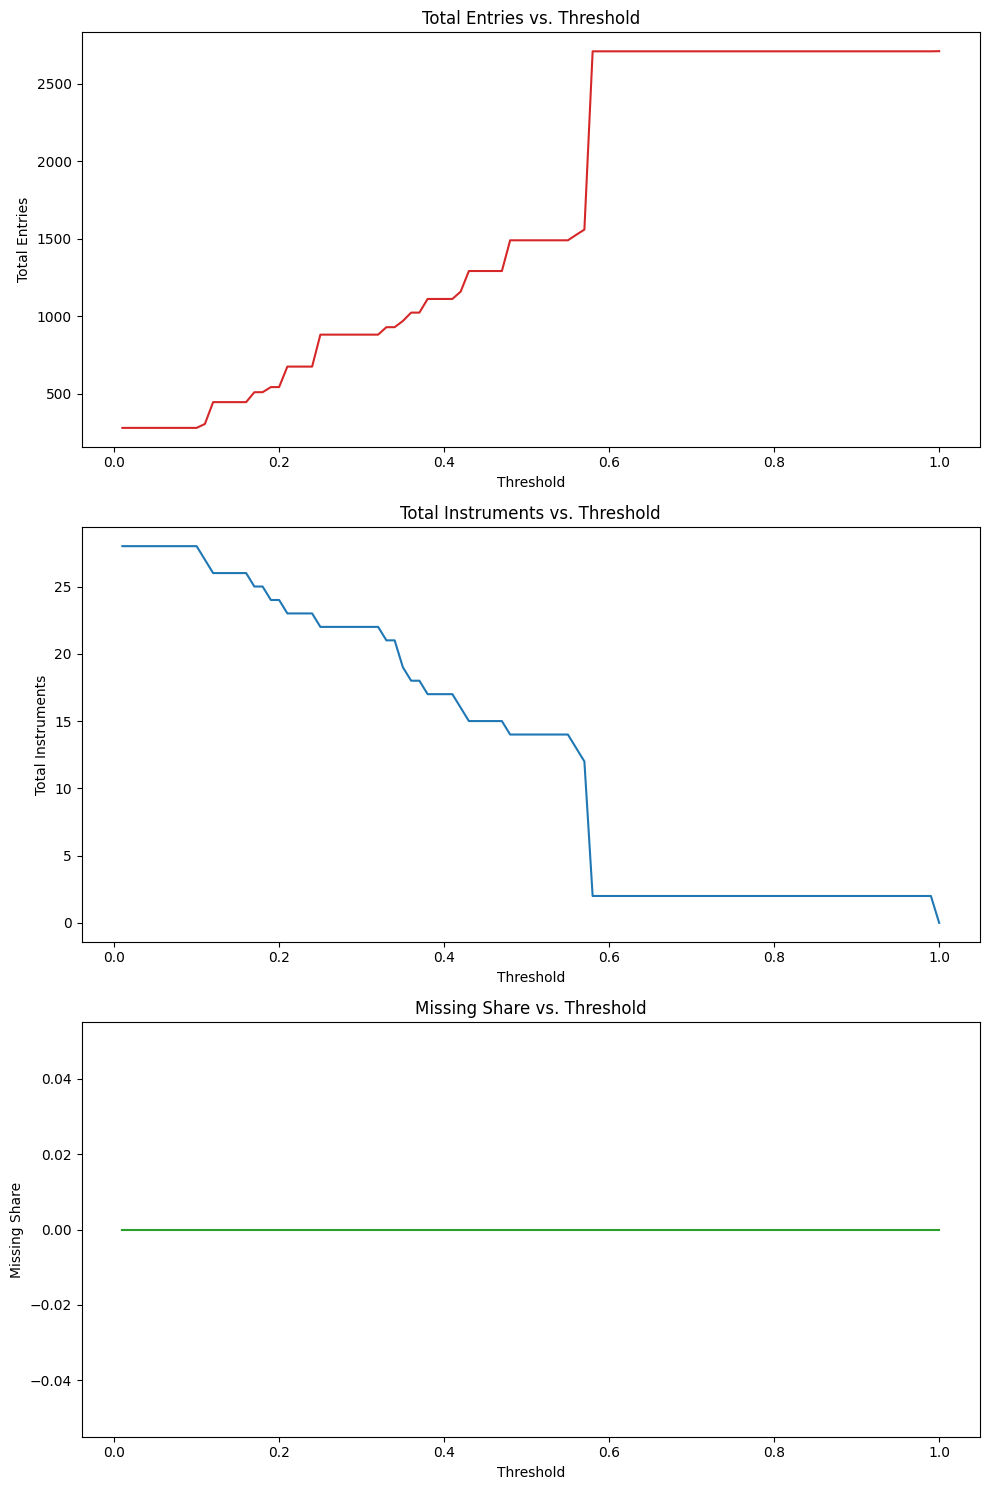

In [38]:
find_threshold(cryptos)

In [40]:
clean_cryptos = get_cleaned_data(cryptos, threshold = 0.5)
clean_cryptos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1490 entries, 2018-01-18 to 2022-02-15
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ADA-USD    1490 non-null   float64
 1   BNB-USD    1490 non-null   float64
 2   BTC-USD    1490 non-null   float64
 3   DOGE-USD   1490 non-null   float64
 4   ETH-USD    1490 non-null   float64
 5   FIL-USD    1490 non-null   float64
 6   LINK-USD   1490 non-null   float64
 7   LTC-USD    1490 non-null   float64
 8   THETA-USD  1490 non-null   float64
 9   TRX-USD    1490 non-null   float64
 10  USDT-USD   1490 non-null   float64
 11  XLM-USD    1490 non-null   float64
 12  XRP-USD    1490 non-null   float64
 13  XTZ-USD    1490 non-null   float64
dtypes: float64(14)
memory usage: 174.6 KB


0 1064 0.0


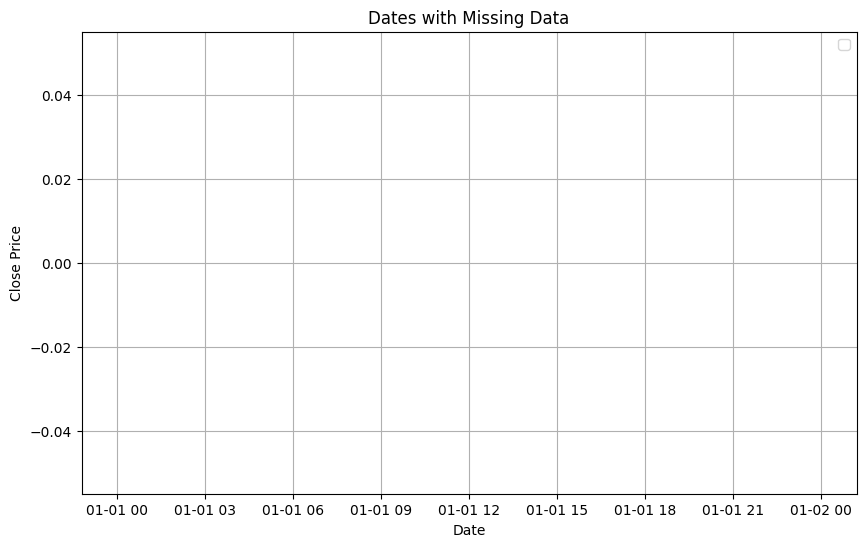

In [41]:
plot_dates(clean_cryptos, clean_cryptos.index.min(), clean_cryptos.index.max())
# plot_dates(clean_cryptos, '2019-01-01', '2021-12-31')

# Save to CSV

In [82]:
clean_stocks.head()

Ticker,A,AAPL,ABT,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2005-04-15,-0.013148,-0.052622,0.032195,-0.005936,-0.015873,-0.045440,-0.024366,-0.042399,-0.024098,-0.000316,...,0.007018,-0.040574,-0.038372,-0.008821,-0.044552,-0.005446,-0.008922,0.016392,-0.003142,-0.011530
2005-04-18,0.013148,0.007609,-0.018008,-0.006471,0.003106,-0.102142,0.015710,-0.026824,-0.002304,0.000947,...,-0.012667,-0.005151,-0.011940,0.004126,0.018689,0.000910,-0.008199,-0.009464,0.022887,0.017911
2005-04-19,0.004826,0.040440,-0.016676,-0.001999,-0.005776,0.059023,0.014581,0.013258,-0.004855,0.017517,...,0.006213,-0.002129,0.002366,0.008785,0.023819,-0.007850,0.008199,0.002732,0.023663,0.001331
2005-04-20,-0.012597,-0.043533,-0.018226,0.001999,-0.024358,-0.014738,-0.012784,-0.032221,-0.007911,-0.015940,...,-0.009050,-0.004119,-0.068631,0.003492,-0.025742,-0.001467,-0.018290,0.008923,0.017651,-0.016084
2005-04-21,0.038264,0.045957,0.016772,0.003987,0.002736,0.039221,0.027448,0.022909,0.036468,0.039536,...,-0.020087,-0.021945,0.005948,0.017853,0.036768,0.021787,-0.043954,0.016979,0.003157,0.019917


In [42]:
clean_commodities.head()

Ticker,CC=F,CL=F,CT=F,GC=F,HG=F,KC=F,NG=F,SB=F,SI=F,ZR=F
Date,,,,,,,,,,
2000-08-31,-0.019934,-0.009023,-0.021543,0.015937,0.000000,0.008086,-0.005216,-0.018762,0.014699,-0.036026
2000-09-06,0.006431,0.033458,-0.002793,-0.005818,-0.004979,0.028988,0.020948,-0.004805,-0.003006,0.004789
2000-09-07,-0.024661,0.010814,-0.003424,-0.000730,0.004979,0.035893,-0.013316,0.033163,-0.009679,0.004766
2000-09-08,0.022093,-0.047235,0.009002,-0.002558,0.006601,-0.007722,-0.023893,-0.005607,-0.002435,0.000000
2000-09-11,-0.014240,0.040703,-0.001856,-0.000732,0.001096,0.004512,0.027288,-0.025630,-0.007749,0.052481


In [43]:
clean_cryptos.head()

Ticker,ADA-USD,BNB-USD,BTC-USD,DOGE-USD,ETH-USD,FIL-USD,LINK-USD,LTC-USD,THETA-USD,TRX-USD,USDT-USD,XLM-USD,XRP-USD,XTZ-USD
Date,,,,,,,,,,,,,,
2018-01-18,0.047709,0.005421,0.025267,0.041115,0.021488,-0.065525,0.063223,0.033328,0.065041,0.095234,0.008422,0.065566,0.200635,0.125402
2018-01-19,-0.014264,0.045194,0.011481,-0.012374,0.002718,0.006259,0.088264,0.000658,-0.080468,-0.032750,-0.018317,-0.006480,-0.028287,-0.078879
2018-01-20,0.084014,0.080330,0.105522,0.070745,0.105875,0.068632,0.405418,0.089440,0.051086,0.056768,-0.003420,0.054668,0.016974,0.050070
2018-01-21,-0.143121,-0.140488,-0.106152,-0.169478,-0.095840,-0.061634,-0.317254,-0.102706,-0.140125,-0.179717,-0.001248,-0.141526,-0.134439,-0.084182
2018-01-22,-0.072191,-0.077852,-0.059374,-0.057282,-0.045135,-0.014285,-0.100600,-0.056236,-0.071690,0.003170,0.005166,0.046767,-0.016578,0.031487


In [44]:
# clean_stocks.to_csv('stocks.csv')
# clean_commodities.to_csv('commodities.csv')
# clean_cryptos.to_csv('cryptos.csv')